<a href="https://colab.research.google.com/github/Panchagiri-vidyasri/data-analysis-using-python_2116/blob/main/daup_csv_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Load the dataset
file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df.drop(columns=["User ID", "Unnamed: 16", "Date"], inplace=True, errors='ignore')

# Handle missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical variables
categorical_columns = ["Gender", "Location", "Phone Brand", "OS", "Primary Use"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numerical features
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
df[numerical_columns] = StandardScaler().fit_transform(df[numerical_columns])

# Save preprocessed data
df.to_csv("/content/phone_usage_india.csv", index=False)

print("Preprocessing complete. Preprocessed data saved as 'preprocessed_phone_usage.csv'.")


Preprocessing complete. Preprocessed data saved as 'preprocessed_phone_usage.csv'.


In [ ]:
# Convert dataset to a matrix
matrix_data = df.values

# Extract a vector (example: 'Screen Time (hrs/day)')
vector_data = df["Screen Time (hrs/day)"].values

# Scale numerical features
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
df[numerical_columns] = StandardScaler().fit_transform(df[numerical_columns])

print("Matrix shape:", matrix_data.shape)
print("Vector sample:", vector_data[:5])


Matrix shape: (17686, 15)
Vector sample: [-0.89717797  0.83642273 -0.64501787  1.40378296 -1.36997817]


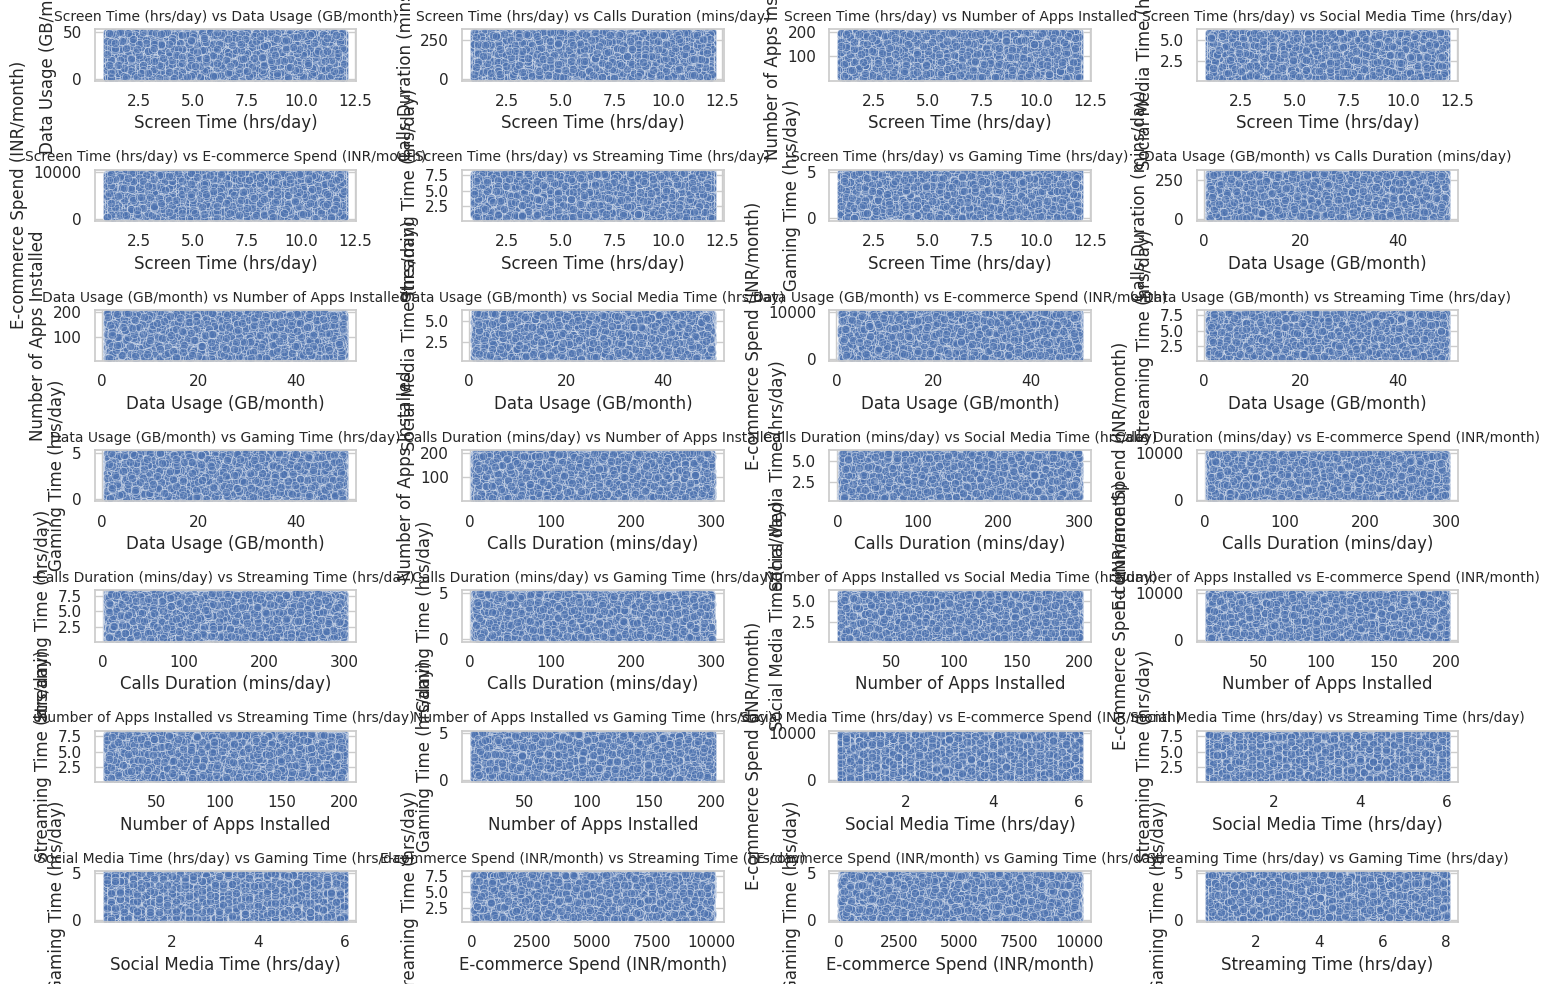

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


# Select numerical columns relevant to phone usage
numerical_columns = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)",
    "E-commerce Spend (INR/month)", "Streaming Time (hrs/day)", "Gaming Time (hrs/day)"
]

# Generate scatter plots for all unique pairs of numerical features
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Create a grid of scatter plots
numplots = 1
total_plots = len(list(itertools.combinations(numerical_columns, 2)))
rows = total_plots // 4 + (total_plots % 4 > 0)  # Adjust rows dynamically

for col1, col2 in itertools.combinations(numerical_columns, 2):
    plt.subplot(rows, 4, numplots)
    sns.scatterplot(x=df[col1], y=df[col2], alpha=0.5)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f"{col1} vs {col2}", fontsize=10)
    numplots += 1

plt.tight_layout()
plt.show()


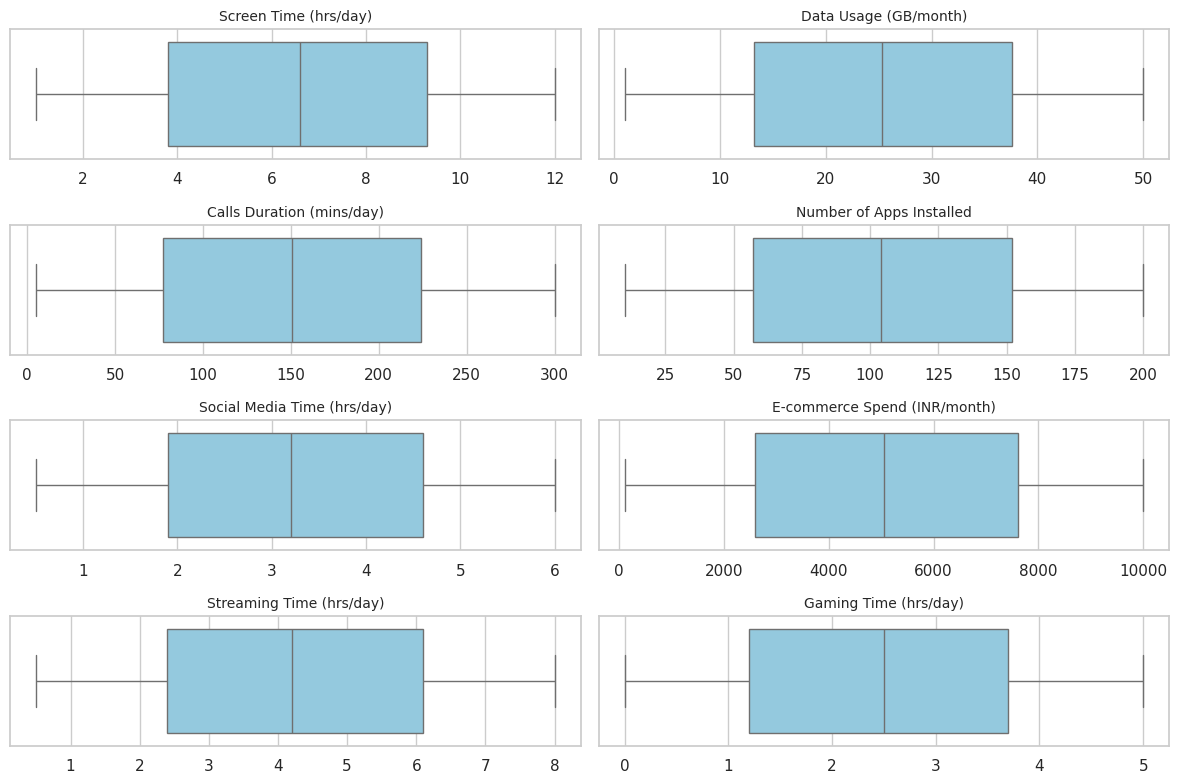

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)",
    "E-commerce Spend (INR/month)", "Streaming Time (hrs/day)", "Gaming Time (hrs/day)"
]

# Drop missing values in selected columns
df = df[numerical_cols].dropna()

# Set plot style
sns.set(style="whitegrid")

# Create individual box plots for better readability
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)  # Creating subplots (4 rows, 2 columns)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col, fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()


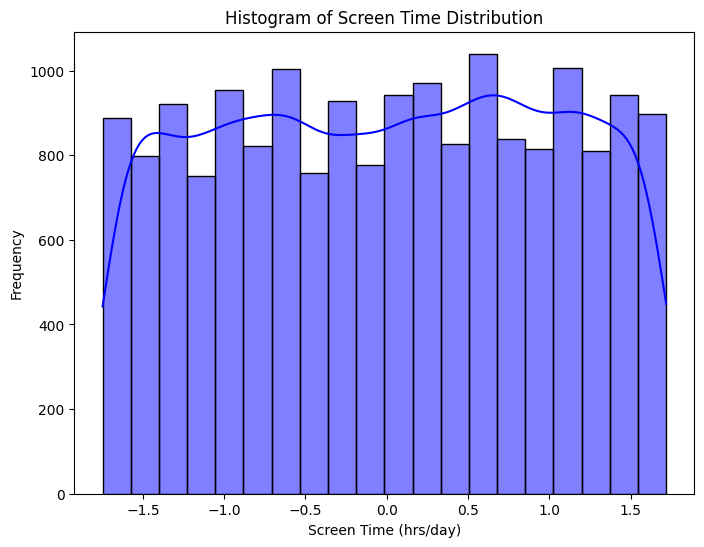

In [ ]:
# Histogram: Screen Time Distribution
plt.figure(figsize=(8,6))
sns.histplot(df["Screen Time (hrs/day)"], bins=20, kde=True, color='blue')
plt.xlabel("Screen Time (hrs/day)")
plt.ylabel("Frequency")
plt.title("Histogram of Screen Time Distribution")
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the dataset
file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)

# Selecting numerical columns
numerical_cols = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)", "Monthly Recharge Cost (INR)"
]

# Computing skewness and kurtosis
skewness = df[numerical_cols].apply(skew)
kurtosis_values = df[numerical_cols].apply(kurtosis)

# Detecting outliers using IQR method
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

# Displaying results
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis_values)
print("\nOutliers detected:\n", outliers)


Skewness:
 Screen Time (hrs/day)          -0.027598
Data Usage (GB/month)           0.014190
Calls Duration (mins/day)       0.024952
Number of Apps Installed        0.008328
Social Media Time (hrs/day)     0.000885
E-commerce Spend (INR/month)    0.002822
Streaming Time (hrs/day)        0.010552
Gaming Time (hrs/day)           0.008081
Monthly Recharge Cost (INR)     0.017293
dtype: float64

Kurtosis:
 Screen Time (hrs/day)          -1.197591
Data Usage (GB/month)          -1.192246
Calls Duration (mins/day)      -1.192532
Number of Apps Installed       -1.202582
Social Media Time (hrs/day)    -1.196993
E-commerce Spend (INR/month)   -1.215948
Streaming Time (hrs/day)       -1.181237
Gaming Time (hrs/day)          -1.197812
Monthly Recharge Cost (INR)    -1.207581
dtype: float64

Outliers detected:
 {'Screen Time (hrs/day)': 0, 'Data Usage (GB/month)': 0, 'Calls Duration (mins/day)': 0, 'Number of Apps Installed': 0, 'Social Media Time (hrs/day)': 0, 'E-commerce Spend (INR/month)': 0,

Root Mean Squared Error (RMSE): 0.9988
R² Score: -0.0004


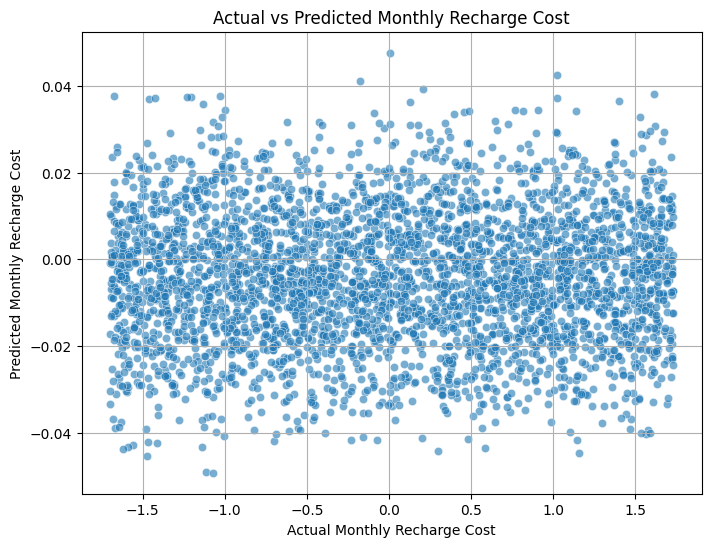

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)

# Select relevant numerical features
features = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)", "Monthly Recharge Cost (INR)"
]
target = "Monthly Recharge Cost (INR)"  # Predicting monthly recharge cost

# Drop missing values
df = df[features].dropna()

# Split data into input (X) and output (y)
X = df.drop(columns=[target])
y = df[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Monthly Recharge Cost")
plt.ylabel("Predicted Monthly Recharge Cost")
plt.title("Actual vs Predicted Monthly Recharge Cost")
plt.grid(True)
plt.show()


Root Mean Squared Error (RMSE): 1.1270
R² Score: -0.2737


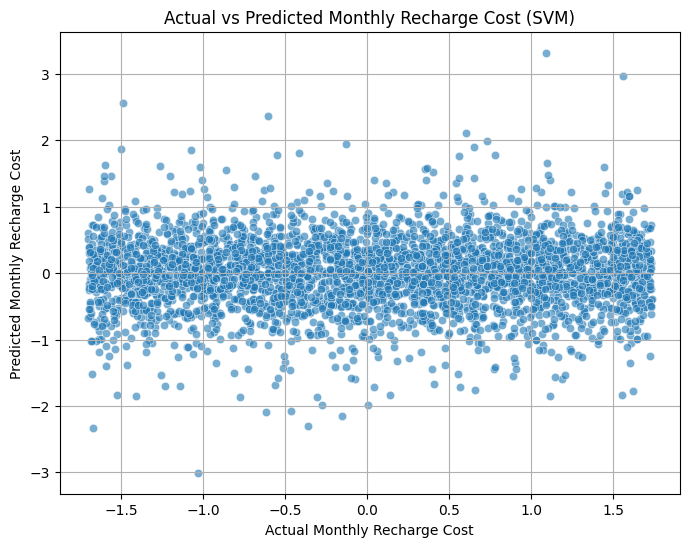

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)

# Select relevant numerical features
features = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)", "Monthly Recharge Cost (INR)"
]
target = "Monthly Recharge Cost (INR)"  # Predicting monthly recharge cost

# Drop missing values
df = df[features].dropna()

# Split data into input (X) and output (y)
X = df.drop(columns=[target])
y = df[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Support Vector Regression model
svr_model = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)  # Using RBF kernel
svr_model.fit(X_train, y_train)

# Predictions
y_pred = svr_model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Monthly Recharge Cost")
plt.ylabel("Predicted Monthly Recharge Cost")
plt.title("Actual vs Predicted Monthly Recharge Cost (SVM)")
plt.grid(True)
plt.show()

Root Mean Squared Error (RMSE): 1.0237
R² Score: -0.0508


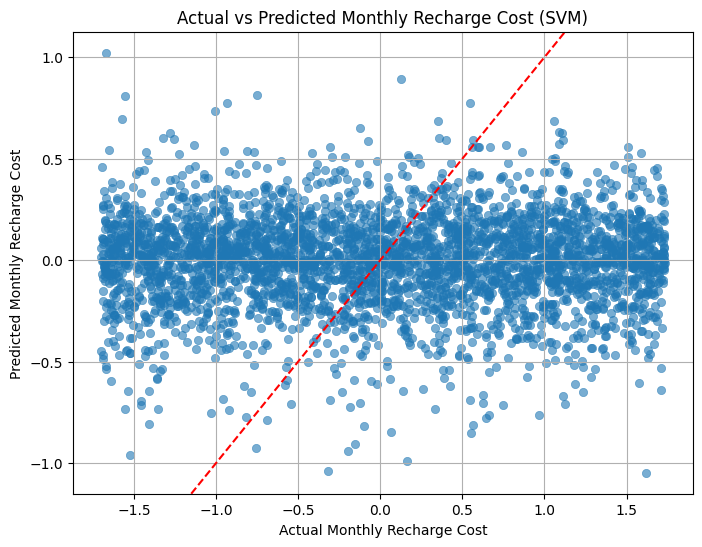

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)

# Select relevant numerical features
features = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)"
]
target = "Monthly Recharge Cost (INR)"  # Predicting monthly recharge cost

# Drop missing values
df = df[features + [target]].dropna()

# Split data into input (X) and output (y)
X = df[features]
y = df[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Support Vector Regression model with optimized parameters
svr_model = SVR(kernel="rbf", C=10, gamma=0.05, epsilon=0.05)  # Tuned hyperparameters
svr_model.fit(X_train, y_train)

# Predictions
y_pred = svr_model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.axline((0, 0), slope=1, color="red", linestyle="--")  # Adding a reference line
plt.xlabel("Actual Monthly Recharge Cost")
plt.ylabel("Predicted Monthly Recharge Cost")
plt.title("Actual vs Predicted Monthly Recharge Cost (SVM)")
plt.grid(True)
plt.show()


Class distribution before splitting:
 recharge_category
0    13842
2     2854
1      990
Name: count, dtype: int64
Training class distribution:
 recharge_category
0    11073
2     2283
1      792
Name: count, dtype: int64
Testing class distribution:
 recharge_category
0    2769
2     571
1     198
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Accuracy: 0.7826

Confusion Matrix:
 [[2769    0    0]
 [ 198    0    0]
 [ 571    0    0]]

Classification Report:
               precision    recall  f1-score   support

        High       0.78      1.00      0.88      2769
         Low       0.00      0.00      0.00       198
    Moderate       0.00      0.00      0.00       571

    accuracy                           0.78      3538
   macro avg       0.26      0.33      0.29      3538
weighted avg       0.61      0.78      0.69      3538



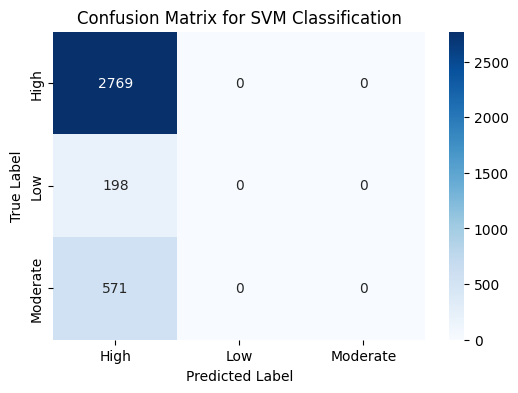

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# Load dataset
file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)

# Select numerical features
features = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)"
]
target = "Monthly Recharge Cost (INR)"

# Drop missing values
df = df[features + [target]].dropna()

# Convert recharge cost into categories
def categorize_recharge(cost):
    if cost < 200:
        return "Low"
    elif 200 <= cost < 500:
        return "Moderate"
    else:
        return "High"

df["recharge_category"] = df[target].apply(categorize_recharge)

# Encode categories (Low=0, Moderate=1, High=2)
label_encoder = LabelEncoder()
df["recharge_category"] = label_encoder.fit_transform(df["recharge_category"])

# Define input (X) and output (y)
X = df[features]
y = df["recharge_category"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check class distribution before splitting
print("Class distribution before splitting:\n", y.value_counts())

# Stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Check class distribution after split
print("Training class distribution:\n", pd.Series(y_train).value_counts())
print("Testing class distribution:\n", pd.Series(y_test).value_counts())

# Handle class imbalance with SMOTE if needed
if len(np.unique(y_train)) < 2:
    print("Warning: Only one class found in training set. Applying SMOTE...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("New training class distribution:\n", pd.Series(y_train).value_counts())

# Train Support Vector Classification model
svc_model = SVC(kernel="rbf", C=1, gamma="scale")
svc_model.fit(X_train, y_train)

# Predictions
y_pred = svc_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print results
print(f"Model Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM Classification")
plt.show()


Logistic Regression Accuracy: 0.7826
Classification Report:
               precision    recall  f1-score   support

        High       0.78      1.00      0.88      2769
         Low       0.00      0.00      0.00       198
    Moderate       0.00      0.00      0.00       571

    accuracy                           0.78      3538
   macro avg       0.26      0.33      0.29      3538
weighted avg       0.61      0.78      0.69      3538

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.7829
Classification Report:
               precision    recall  f1-score   support

        High       0.78      1.00      0.88      2769
         Low       0.00      0.00      0.00       198
    Moderate       1.00      0.00      0.00       571

    accuracy                           0.78      3538
   macro avg       0.59      0.33      0.29      3538
weighted avg       0.77      0.78      0.69      3538

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K-Nearest Neighbors Accuracy: 0.7581
Classification Report:
               precision    recall  f1-score   support

        High       0.78      0.96      0.86      2769
         Low       0.00      0.00      0.00       198
    Moderate       0.11      0.02      0.04       571

    accuracy                           0.76      3538
   macro avg       0.30      0.33      0.30      3538
weighted avg       0.63      0.76      0.68      3538

--------------------------------------------------
Gradient Boosting Accuracy: 0.7815
Classification Report:
               precision    recall  f1-score   support

        High       0.78      1.00      0.88      2769
         Low       0.00      0.00      0.00       198
    Moderate       0.29      0.00      0.01       571

    accuracy                           0.78      3538
   macro avg       0.36      0.33      0.29      3538
weighted avg       0.66      0.78      0.69      3538

--------------------------------------------------


<ipython-input-2-72d0099d4b59>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


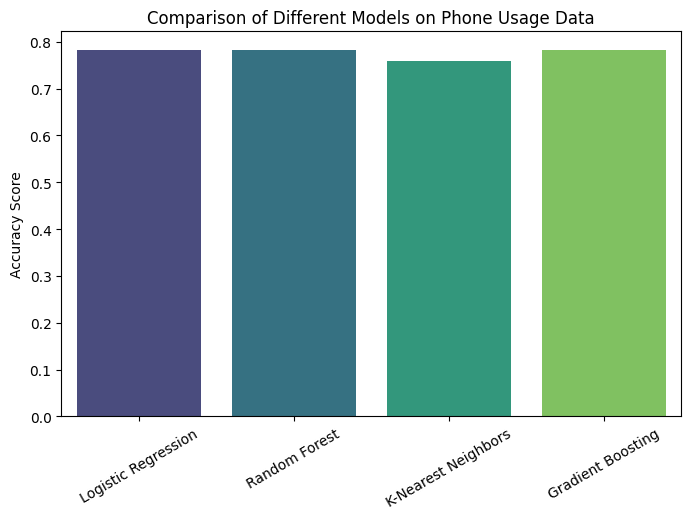

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)

# Select numerical features
features = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)"
]
target = "Monthly Recharge Cost (INR)"

# Drop missing values
df = df[features + [target]].dropna()

# Convert recharge cost into categories
def categorize_recharge(cost):
    if cost < 200:
        return "Low"
    elif 200 <= cost < 500:
        return "Moderate"
    else:
        return "High"

df["recharge_category"] = df[target].apply(categorize_recharge)

# Encode categories (Low=0, Moderate=1, High=2)
label_encoder = LabelEncoder()
df["recharge_category"] = label_encoder.fit_transform(df["recharge_category"])

# Define input (X) and output (y)
X = df[features]
y = df["recharge_category"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("-" * 50)

# Plot model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Different Models on Phone Usage Data")
plt.xticks(rotation=30)
plt.show()


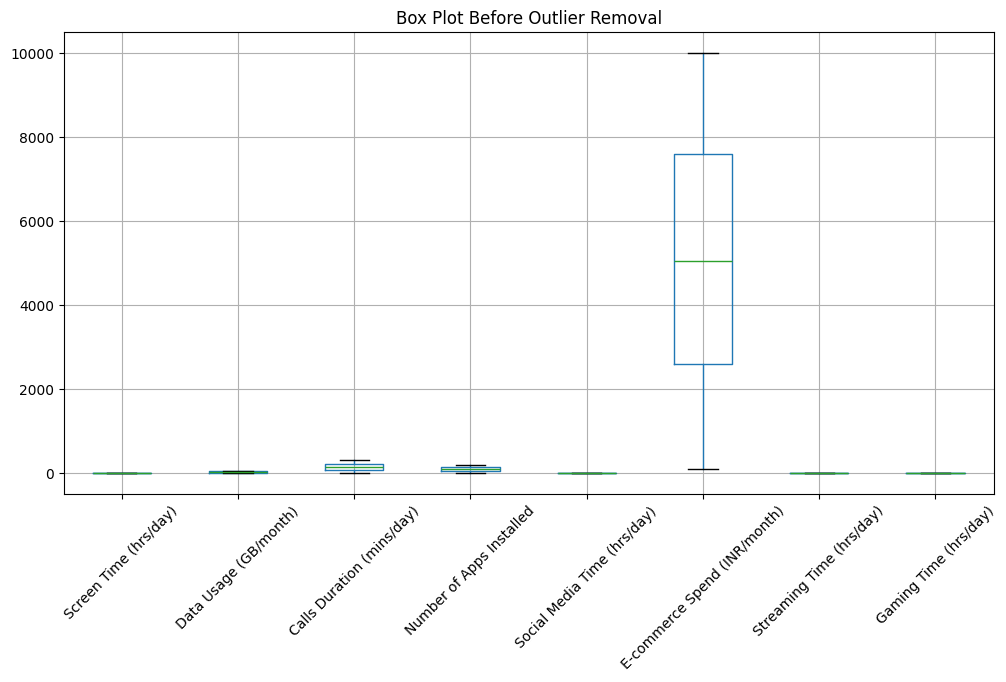

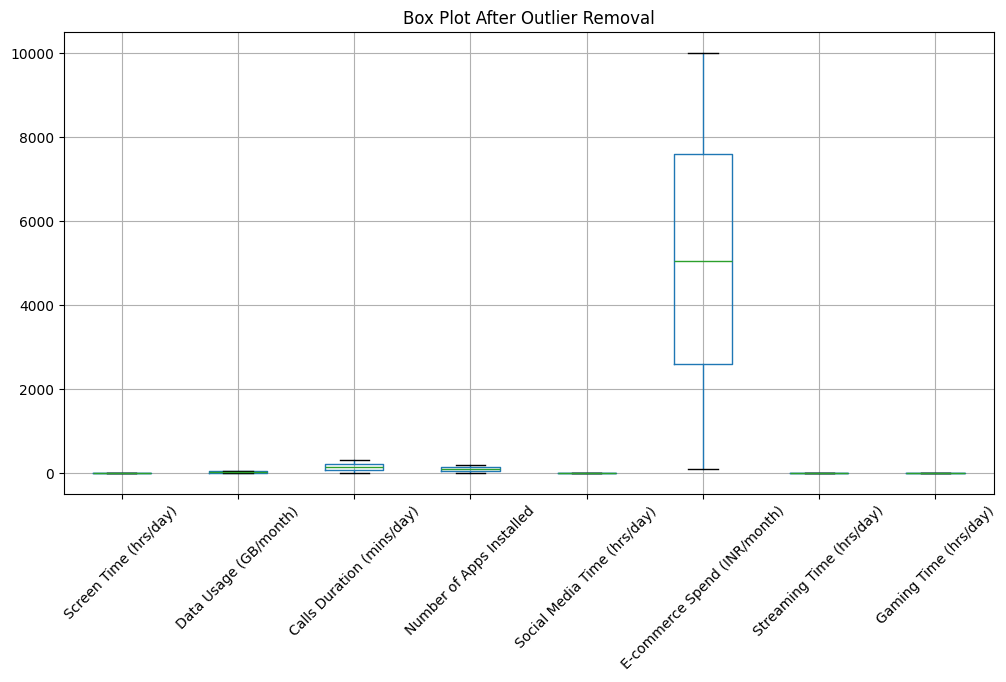

Original dataset shape: (17686, 18)
Cleaned dataset shape: (17686, 18)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)

# Select numerical features for outlier removal
numerical_cols = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)"
]

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    df_cleaned = df.copy()  # Avoid modifying the original dataframe
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df_cleaned[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

# Plot boxplots before removing outliers
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=45)  # Rotate labels for better visibility
plt.title("Box Plot Before Outlier Removal")
plt.show()

# Remove outliers
df_cleaned = remove_outliers(df, numerical_cols)

# Plot boxplots after removing outliers
plt.figure(figsize=(12, 6))
df_cleaned[numerical_cols].boxplot(rot=45)
plt.title("Box Plot After Outlier Removal")
plt.show()

# Print dataset shape before and after outlier removal
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


Logistic Regression Accuracy: 0.7826
Classification Report:
               precision    recall  f1-score   support

        High       0.78      1.00      0.88      2769
         Low       0.00      0.00      0.00       198
    Moderate       0.00      0.00      0.00       571

    accuracy                           0.78      3538
   macro avg       0.26      0.33      0.29      3538
weighted avg       0.61      0.78      0.69      3538

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.7829
Classification Report:
               precision    recall  f1-score   support

        High       0.78      1.00      0.88      2769
         Low       0.00      0.00      0.00       198
    Moderate       1.00      0.00      0.00       571

    accuracy                           0.78      3538
   macro avg       0.59      0.33      0.29      3538
weighted avg       0.77      0.78      0.69      3538

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K-Nearest Neighbors Accuracy: 0.7581
Classification Report:
               precision    recall  f1-score   support

        High       0.78      0.96      0.86      2769
         Low       0.00      0.00      0.00       198
    Moderate       0.11      0.02      0.04       571

    accuracy                           0.76      3538
   macro avg       0.30      0.33      0.30      3538
weighted avg       0.63      0.76      0.68      3538

--------------------------------------------------
Gradient Boosting Accuracy: 0.7815
Classification Report:
               precision    recall  f1-score   support

        High       0.78      1.00      0.88      2769
         Low       0.00      0.00      0.00       198
    Moderate       0.29      0.00      0.01       571

    accuracy                           0.78      3538
   macro avg       0.36      0.33      0.29      3538
weighted avg       0.66      0.78      0.69      3538

--------------------------------------------------


<ipython-input-4-022c9e389536>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


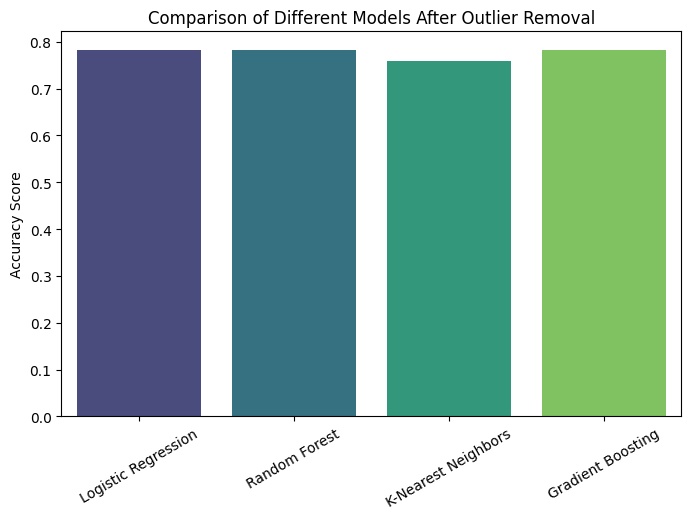

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
file_path = "/content/phone_usage_india.csv"
df = pd.read_csv(file_path)

# Define features and target
features = [
    "Screen Time (hrs/day)", "Data Usage (GB/month)", "Calls Duration (mins/day)",
    "Number of Apps Installed", "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)"
]
target = "Monthly Recharge Cost (INR)"

# Drop missing values
df_cleaned = df[features + [target]].dropna()

# Convert recharge cost into categories
def categorize_recharge(cost):
    if cost < 200:
        return "Low"
    elif 200 <= cost < 500:
        return "Moderate"
    else:
        return "High"

df_cleaned["recharge_category"] = df_cleaned[target].apply(categorize_recharge)

# Encode categories (Low=0, Moderate=1, High=2)
label_encoder = LabelEncoder()
df_cleaned["recharge_category"] = label_encoder.fit_transform(df_cleaned["recharge_category"])

# Define input (X) and output (y)
X = df_cleaned[features]
y = df_cleaned["recharge_category"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("-" * 50)

# Plot model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Different Models After Outlier Removal")
plt.xticks(rotation=30)
plt.show()
